# Problem 4

In [49]:
# Write a Python program which solves Ax = b by using PA = LU. Test your result.
import scipy.linalg as linalg
import numpy as np

def lu_solve(A,b):
    # if A is not a np.ndarray, convert it to a np.ndarray for convenience.
    if type(A) != np.ndarray:
        A = np.array(A)
    if type(b) != np.ndarray:
        b = np.array(b)

    P, L, U = linalg.lu(A)
    m,n = A.shape

    # Forward elimination to solve L*y = Pb = c

    y = np.zeros(m)
    c = np.dot(P.T,b)

    for i in range(m):
        y[i] = c[i] - np.inner(L[i,:i],y[:i])


    # Back substitution to solve U*x = y
    x = np.zeros(n)
    for j in range(n-1,-1,-1):
        x[j] = (y[j] - (np.inner(U[j,j+1:n],x[j+1:n])))/U[j,j]

    return x

In [50]:
# Check lu_solve function gives same solution as linalg.solve function from scipy.
# If their solutions are same, function is working well.

if __name__ == '__main__':
    A = np.random.randn(5,5)
    b = np.random.randn(5)
    print(lu_solve(A,b))
    print(linalg.solve(A,b))

[-0.96327914  1.45035629  0.39876658 -0.70380801 -0.39954159]
[-0.96327914  1.45035629  0.39876658 -0.70380801 -0.39954159]


# Problem 5

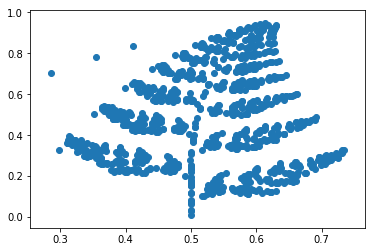

In [51]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

A1 = np.array([[0,0],[0,0.27]])
A2 = np.array([[-.139,.263],[.246,.224]])
A3 = np.array([[.17,-.215],[.222,.176]])
A4 = np.array([[.781, .034],[-.032, .739]])
A = [A1,A2,A3,A4]

d1 = np.array([.5,0])
d2 = np.array([.57,-.036])
d3 = np.array([.408, .0893])
d4 = np.array([.1075, .27])
d = [d1,d2,d3,d4]

p = [.02, .15, .13, .70]

z0 = np.random.randn(2)
z_list = [z0]
for i in range(1000):
    num = np.random.choice(4,1,p=p)[0]
    z_list.append(np.dot(A[num],z_list[i]) + d[num])
    
x = [z[0] for z in z_list]
y = [z[1] for z in z_list]    

plt.scatter(x,y)

# Problem 6

In [52]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open('cat.jpeg')

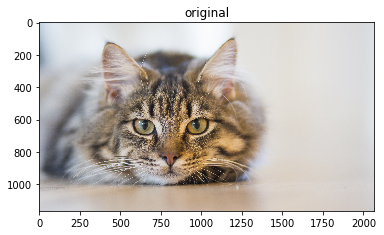

In [53]:
# Original Image
plt.imshow(img)
plt.title('original');

In [54]:
img.size

(2067, 1163)

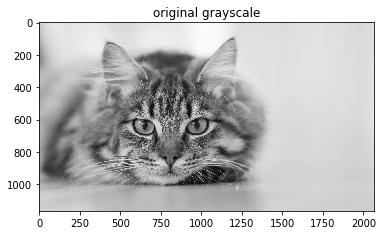

In [55]:
# Makes image grayscale and make a matrix
img = img.convert('L')
A = np.array(img.getdata()).reshape(img.size[1],img.size[0])
plt.imshow(A, cmap = 'gray')
plt.title('original grayscale');

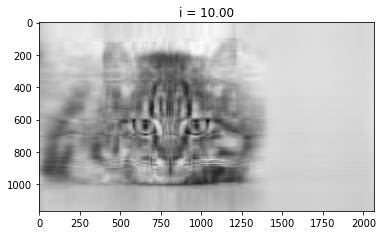

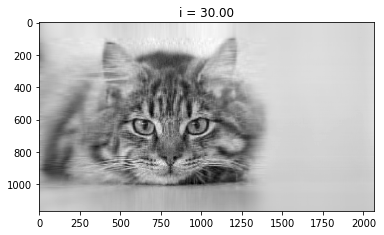

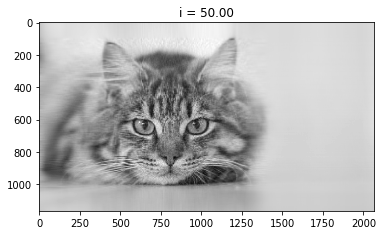

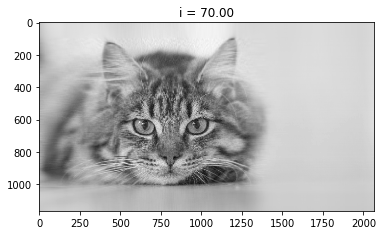

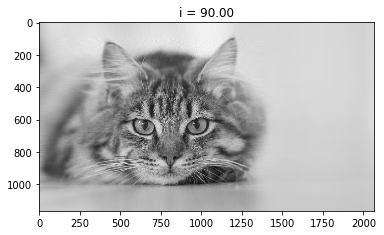

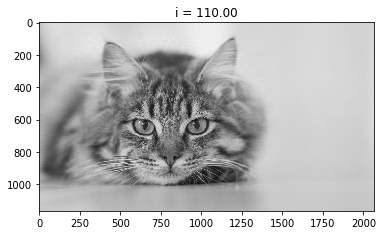

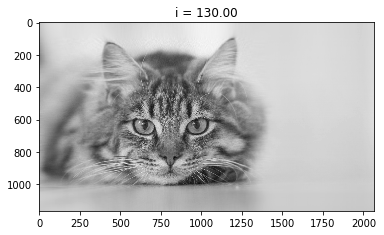

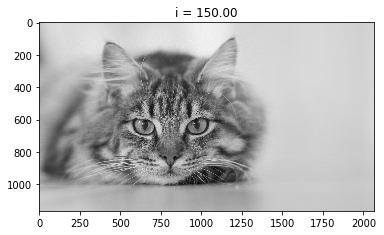

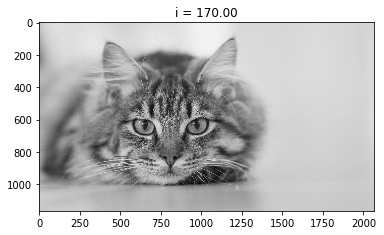

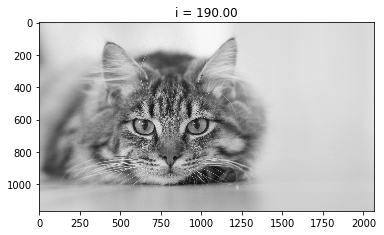

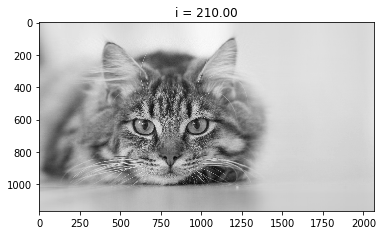

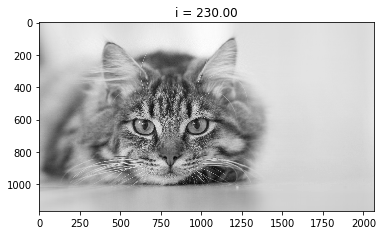

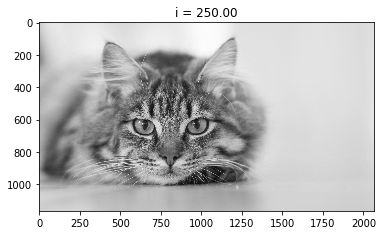

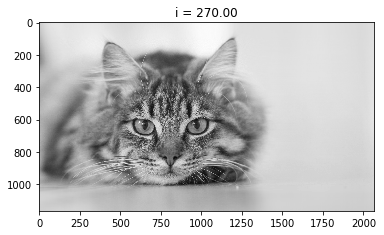

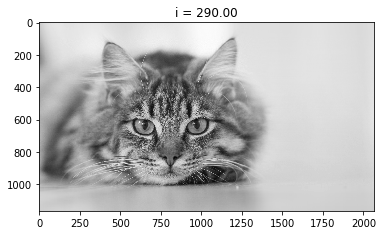

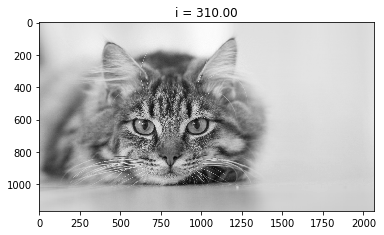

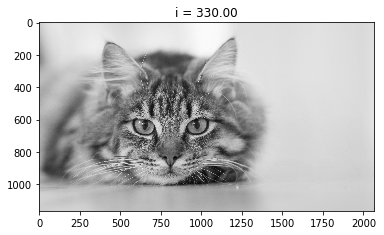

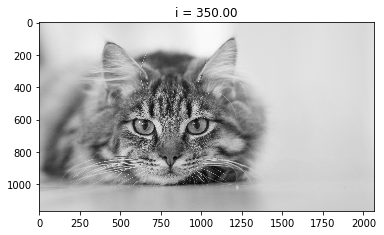

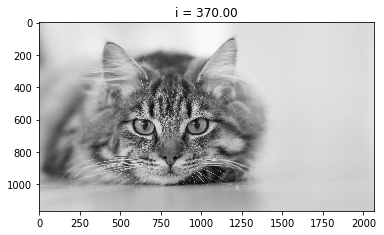

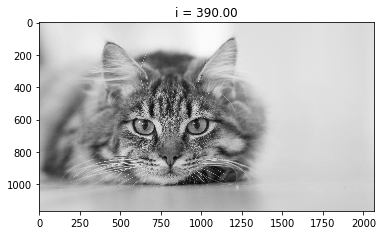

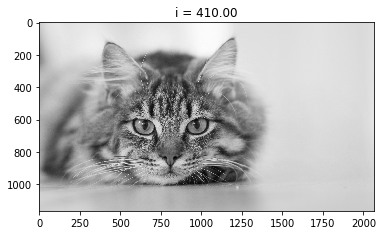

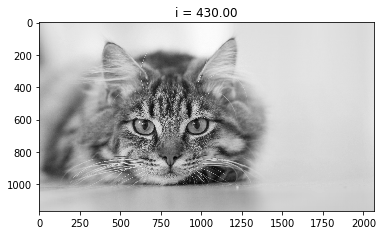

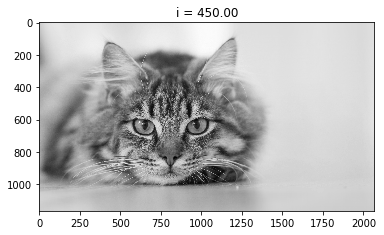

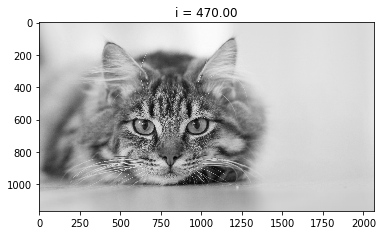

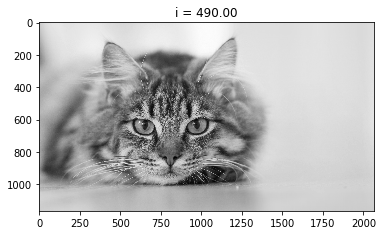

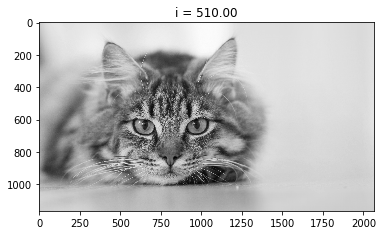

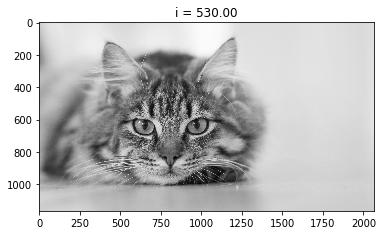

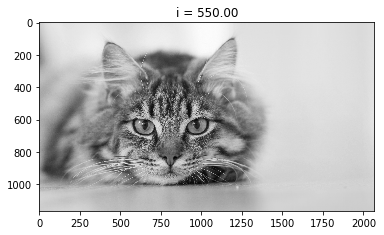

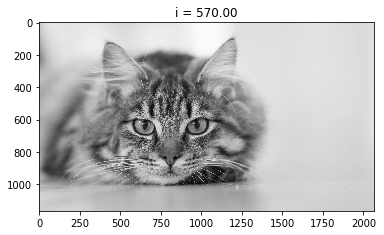

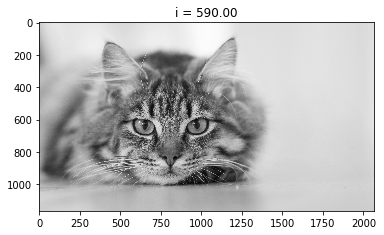

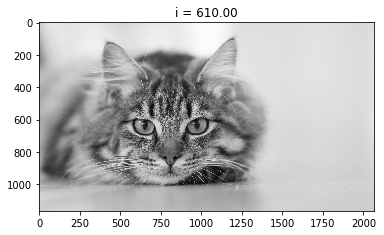

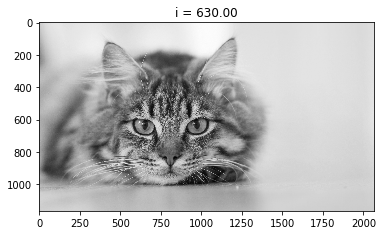

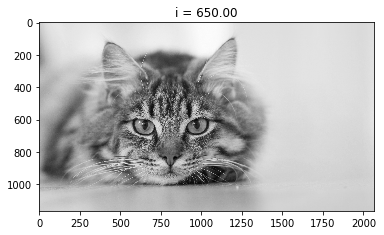

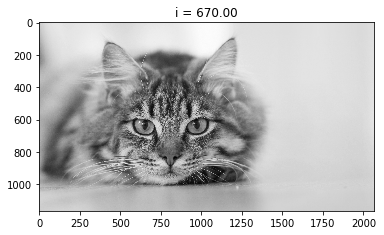

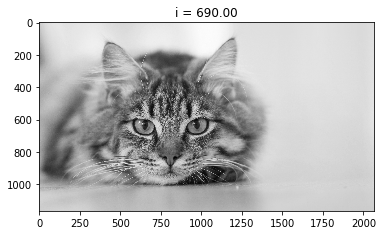

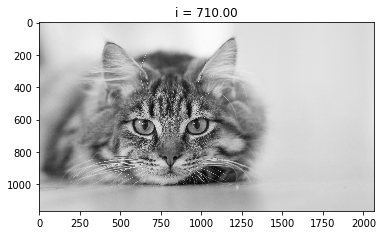

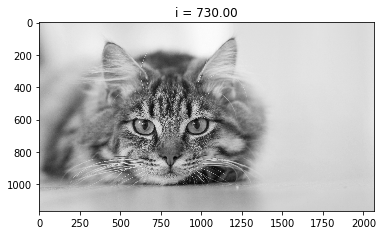

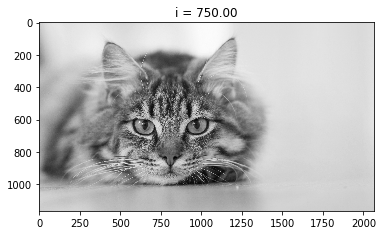

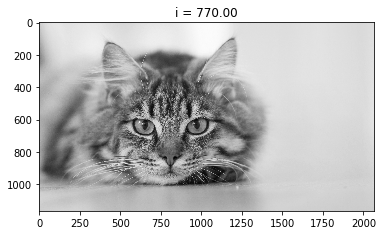

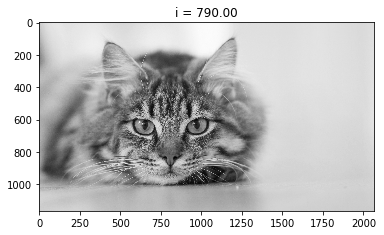

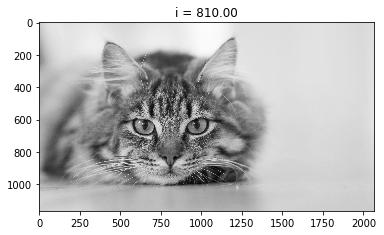

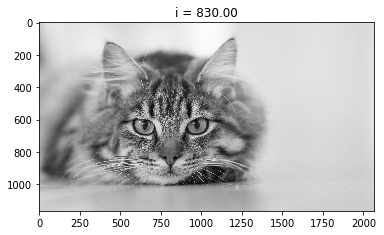

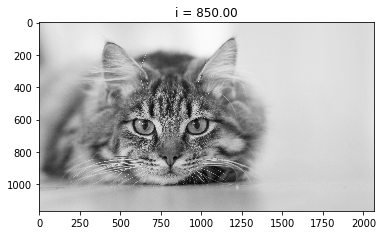

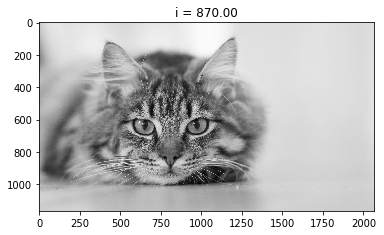

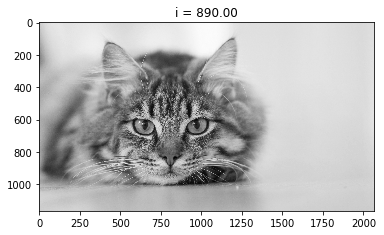

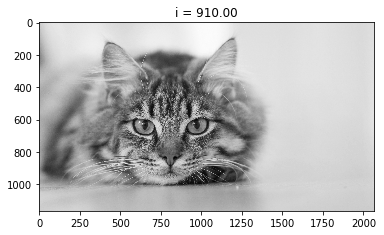

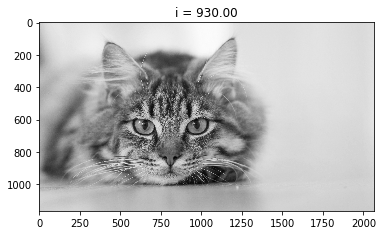

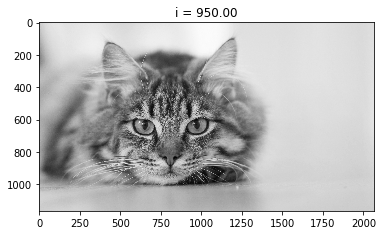

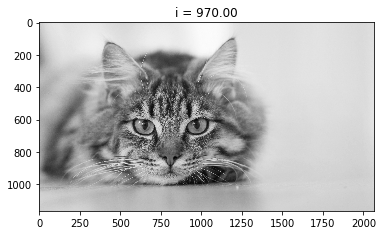

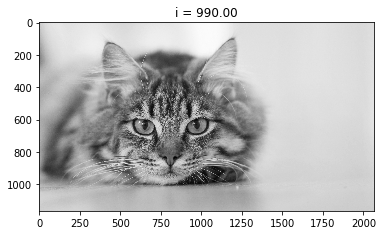

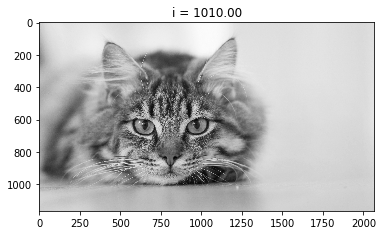

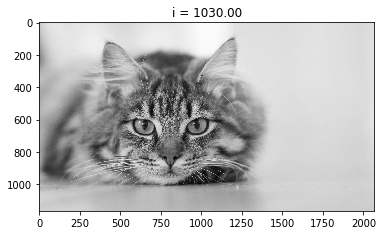

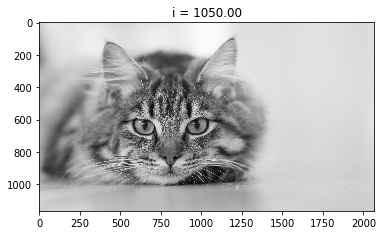

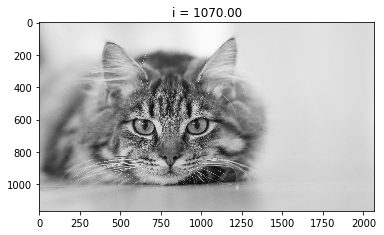

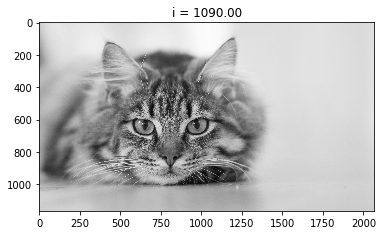

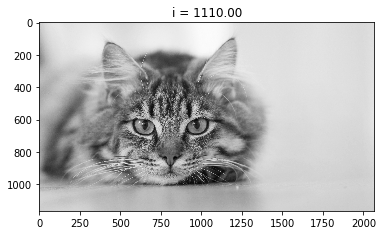

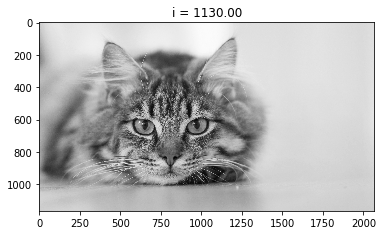

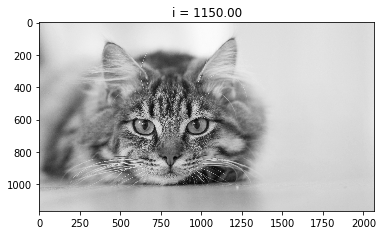

In [18]:
# SVD
U, S, V = np.linalg.svd(A)
S = np.diag(S)

# Run
m = min(A.shape[0],A.shape[1])
B = np.zeros_like(A)

for i in range(m):
    B = B + S[i,i] * np.dot(U[:,i].reshape(-1,1),V[i,:].reshape(1,-1))
    if (i+10) % 20 == 0:
        plt.imshow(B, cmap='gray')
        plt.title("i = %.2f" %i)
        plt.show()

In [19]:
20 % 3

2